In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
## import data
set_1_path = 'data/heart.csv'
heart_df = pd.read_csv(set_1_path)
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
# there are four different chest pain types
heart_df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [17]:
# three different resting ecg responses
heart_df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [18]:
# three st_slope values
heart_df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [26]:
# One hot encoding of categorical data values:
heart_df= pd.get_dummies(heart_df)
heart_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [27]:
# Define input data and target:
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

In [31]:
# Train, test, split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
# Training with unscaled data first:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
print("Unscaled Data:")
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"for k = {k}, Train Score = {train_score:.3f}, Test Score = {test_score:.3f}")

for k = 1, Train Score = 1.000, Test Score = 0.696
for k = 3, Train Score = 0.817, Test Score = 0.709
for k = 5, Train Score = 0.789, Test Score = 0.722
for k = 7, Train Score = 0.781, Test Score = 0.713
for k = 9, Train Score = 0.778, Test Score = 0.704
for k = 11, Train Score = 0.772, Test Score = 0.709
for k = 13, Train Score = 0.753, Test Score = 0.713
for k = 15, Train Score = 0.744, Test Score = 0.678
for k = 17, Train Score = 0.740, Test Score = 0.691
for k = 19, Train Score = 0.734, Test Score = 0.691


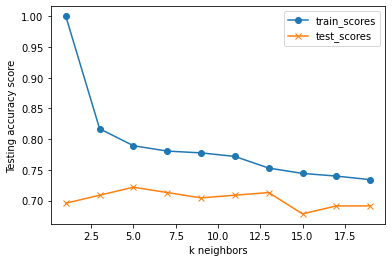

In [46]:
# Plot the elbow curve:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Accuracy Score")
plt.legend(["Training Data", "Testing Data"])
plt.show()

In [48]:
# Apply standard scaling:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
# Now try training with scaled data:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
print("Scaled Data:")
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"for k = {k}, Train Score = {train_score:.3f}, Test Score = {test_score:.3f}")

Scaled Data:
for k = 1, Train Score = 1.000, Test Score = 0.809
for k = 3, Train Score = 0.911, Test Score = 0.852
for k = 5, Train Score = 0.882, Test Score = 0.861
for k = 7, Train Score = 0.879, Test Score = 0.857
for k = 9, Train Score = 0.875, Test Score = 0.865
for k = 11, Train Score = 0.875, Test Score = 0.861
for k = 13, Train Score = 0.868, Test Score = 0.861
for k = 15, Train Score = 0.869, Test Score = 0.870
for k = 17, Train Score = 0.863, Test Score = 0.883
for k = 19, Train Score = 0.866, Test Score = 0.883


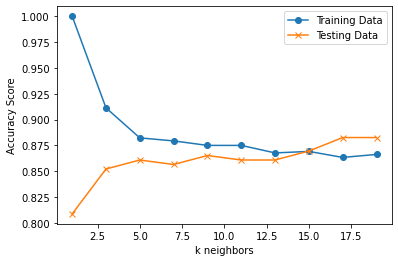

In [52]:
# Plot the elbow curve:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Accuracy Score")
plt.legend(["Training Data", "Testing Data"])
plt.show()

#### Scaled Data should be used with the KNN model. 
#### With this dataset, using k=5 should yield the best accuracy.